<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/PRO/SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

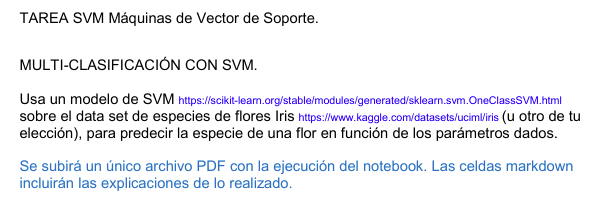

Link al github: https://github.com/Saultr21/IA-Y-BIGDATA/blob/main/PRO/SVM/SVM.ipynb

**Importar librerias y dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clickfb/ds-francis")

print("Path to dataset files:", path)

100%|██████████| 1.28k/1.28k [00:00<00:00, 1.20MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/clickfb/ds-francis/versions/1


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df= pd.read_csv("../iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df1 = df.drop('Id', axis=1)

- Elimina la columna llamada 'Id' del DataFrame df a lo largo del eje 1 (columnas).
- No modifica el DataFrame original df, sino que crea un nuevo DataFrame llamado df1 sin esa columna.

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Comprueba si falta algún dato

In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


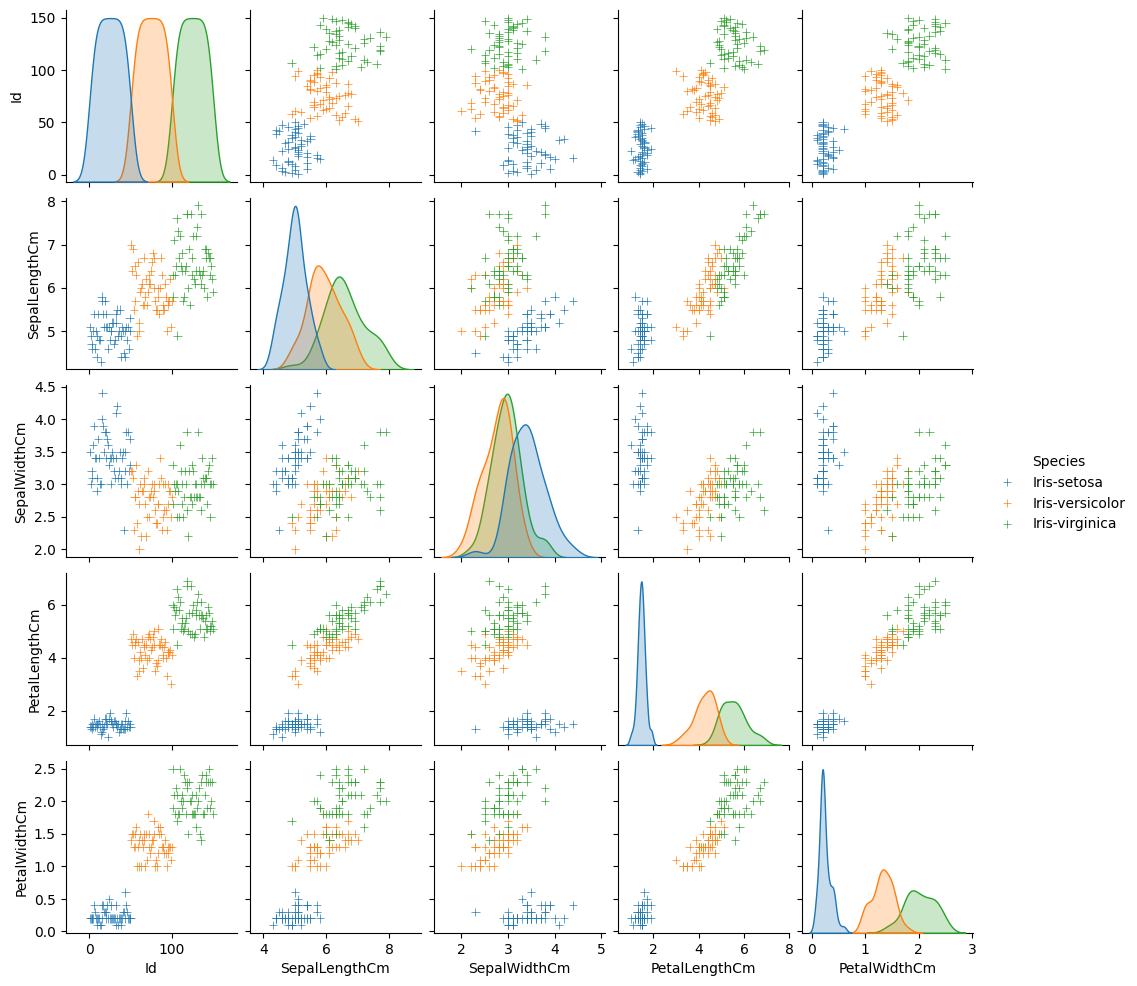

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(df, hue='Species', markers='+', height=2)  # Cambia "height" a un valor más pequeño, por ejemplo, 2
plt.show()


Este código utiliza `seaborn` y `matplotlib` para crear un gráfico de pares (pairplot) de las variables en el `DataFrame` `df`. A continuación se describe lo que hace cada línea:

1. **`g = sns.pairplot(df, hue='Species', markers='+', height=2)`**:
   - `sns.pairplot`: Crea una matriz de gráficos de dispersión (scatter plots) que muestra la relación entre cada par de variables numéricas en el `DataFrame` `df`.
   - `hue='Species'`: Colorea los puntos según la columna `'Species'`, asignando un color distinto a cada especie.
   - `markers='+'`: Define el marcador de los puntos como un símbolo de "+".
   - `height=2`: Ajusta el tamaño de cada gráfico individual dentro de la matriz a 2x2 pulgadas, lo que lo hace más pequeño.

2. **`plt.show()`**:
   - Muestra el gráfico en pantalla.

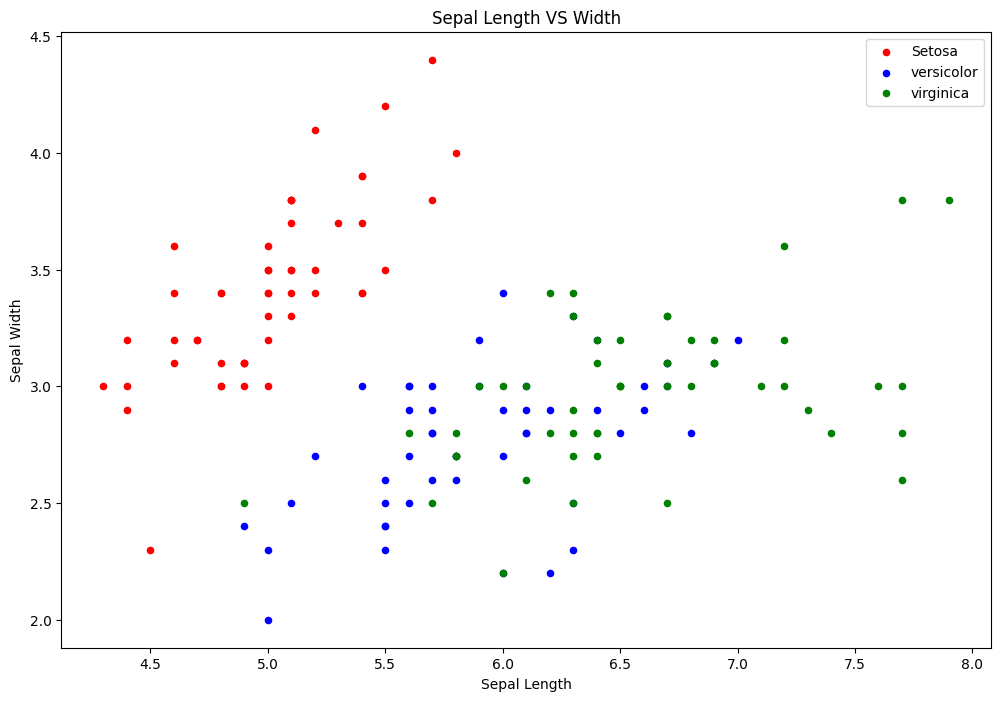

In [ ]:
fig = df1[df1.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Este código crea un gráfico de dispersión (scatter plot) para comparar el **Sepal Length** (longitud del sépalo) y el **Sepal Width** (ancho del sépalo) de las tres especies de flores del conjunto de datos (`Iris-setosa`, `Iris-versicolor` y `Iris-virginica`), diferenciadas por colores. A continuación se explica lo que hace cada línea:

1. **`fig = df1[df1.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Setosa')`**:
   - Filtra el `DataFrame` `df1` para seleccionar solo las filas donde la especie es `'Iris-setosa'`.
   - Crea un gráfico de dispersión usando las columnas `'SepalLengthCm'` y `'SepalWidthCm'` para los valores del eje X y Y, respectivamente.
   - Los puntos correspondientes a `Iris-setosa` se muestran en color rojo y con la etiqueta 'Setosa'.

2. **`df1[df1.Species=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig)`**:
   - Filtra el `DataFrame` `df1` para seleccionar las filas donde la especie es `'Iris-versicolor'`.
   - Crea un gráfico de dispersión para `'Iris-versicolor'` en color azul, añadiéndolo al gráfico existente (`ax=fig`).

3. **`df1[df1.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig)`**:
   - Filtra el `DataFrame` `df1` para seleccionar las filas de `'Iris-virginica'`.
   - Crea un gráfico de dispersión para `'Iris-virginica'` en color verde, agregándolo también al gráfico existente.

4. **`fig.set_xlabel("Sepal Length")`**:
   - Establece la etiqueta del eje X como "Sepal Length" (Longitud del sépalo).

5. **`fig.set_ylabel("Sepal Width")`**:
   - Establece la etiqueta del eje Y como "Sepal Width" (Ancho del sépalo).

6. **`fig.set_title("Sepal Length VS Width")`**:
   - Establece el título del gráfico como "Sepal Length VS Width" (Longitud vs Ancho del Sépalo).

7. **`fig = plt.gcf()`**:
   - Obtiene la figura actual (gráfico) de `matplotlib`.

8. **`fig.set_size_inches(12,8)`**:
   - Establece el tamaño del gráfico a 12x8 pulgadas.

9. **`plt.show()`**:
   - Muestra el gráfico en pantalla.


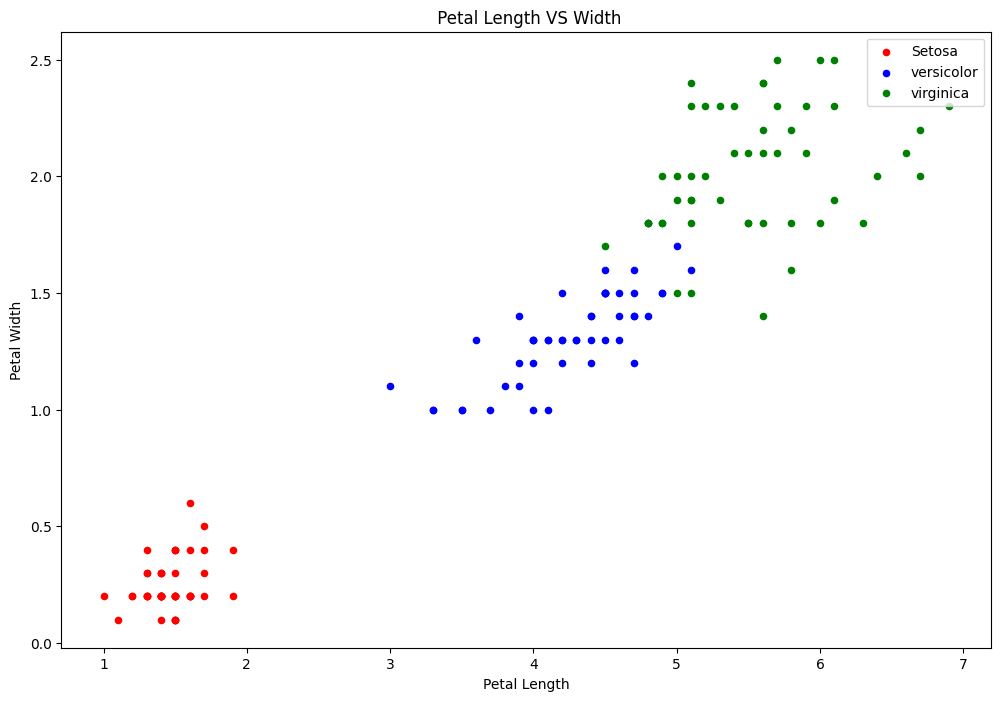

In [ ]:
fig = df1[df1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Este código crea un gráfico de dispersión (scatter plot) para comparar el **Petal Length** (longitud del pétalo) y el **Petal Width** (ancho del pétalo) de las tres especies de flores del conjunto de datos (`Iris-setosa`, `Iris-versicolor` y `Iris-virginica`), diferenciadas por colores. A continuación se describe lo que hace cada línea:

1. **`fig = df1[df1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')`**:
   - Filtra el `DataFrame` `df1` para seleccionar solo las filas donde la especie es `'Iris-setosa'`.
   - Crea un gráfico de dispersión utilizando las columnas `'PetalLengthCm'` y `'PetalWidthCm'` para los valores del eje X y Y, respectivamente.
   - Los puntos correspondientes a `Iris-setosa` se muestran en color rojo y con la etiqueta 'Setosa'.

2. **`df1[df1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)`**:
   - Filtra el `DataFrame` `df1` para seleccionar las filas de `'Iris-versicolor'`.
   - Crea un gráfico de dispersión para `'Iris-versicolor'` en color azul, añadiéndolo al gráfico existente (`ax=fig`).

3. **`df1[df1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)`**:
   - Filtra el `DataFrame` `df1` para seleccionar las filas de `'Iris-virginica'`.
   - Crea un gráfico de dispersión para `'Iris-virginica'` en color verde, agregándolo también al gráfico existente.

4. **`fig.set_xlabel("Petal Length")`**:
   - Establece la etiqueta del eje X como "Petal Length" (Longitud del pétalo).

5. **`fig.set_ylabel("Petal Width")`**:
   - Establece la etiqueta del eje Y como "Petal Width" (Ancho del pétalo).

6. **`fig.set_title("Petal Length VS Width")`**:
   - Establece el título del gráfico como "Petal Length VS Width" (Longitud vs Ancho del Pétalo).

7. **`fig = plt.gcf()`**:
   - Obtiene la figura actual (gráfico) de `matplotlib`.

8. **`fig.set_size_inches(12,8)`**:
   - Establece el tamaño del gráfico a 12x8 pulgadas.

9. **`plt.show()`**:
   - Muestra el gráfico en pantalla.


In [ ]:
df.drop(['Id'] ,inplace =True , axis =1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Este código elimina la columna `'Id'` del `DataFrame` `df` de manera permanente. A continuación se describe lo que hace cada parte:

1. **`df.drop(['Id'], inplace=True, axis=1)`**:
   - `df.drop()`: Elimina las columnas o filas especificadas en el `DataFrame`.
   - `['Id']`: Especifica que se eliminará la columna con nombre `'Id'`.
   - `inplace=True`: Modifica el `DataFrame` original `df` directamente, sin necesidad de asignarlo a una nueva variable.
   - `axis=1`: Indica que se eliminará una columna (cuando `axis=1`, se refiere a columnas; cuando es `axis=0`, se refiere a filas).

2. **`df`**:
   - Muestra el `DataFrame` `df` después de haber eliminado la columna `'Id'`.


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
X_train = train.drop(columns=['Species'],axis=1)
y_train = train['Species']
X_train = X_train /10
X_test = test.drop(columns=['Species'],axis=1)
y_test = test['Species']
X_test /=10

print(X_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
5             0.54          0.39           0.17          0.04
47            0.46          0.32           0.14          0.02
134           0.61          0.26           0.56          0.14
129           0.72          0.30           0.58          0.16
76            0.68          0.28           0.48          0.14


Este código divide el `DataFrame` `df` en un conjunto de entrenamiento y uno de prueba, y luego prepara las características (features) y las etiquetas (labels) para el modelo de aprendizaje automático. Además, normaliza los datos dividiendo las características entre 10. A continuación se explica cada parte:

1. **`from sklearn.model_selection import train_test_split`**:
   - Importa la función `train_test_split` de `sklearn.model_selection`, que se usa para dividir un conjunto de datos en entrenamiento y prueba.

2. **`train, test = train_test_split(df, test_size=0.2)`**:
   - Divide el `DataFrame` `df` en dos subconjuntos: uno para entrenamiento (`train`) y otro para prueba (`test`).
   - El parámetro `test_size=0.2` indica que el 20% de los datos se destinarán al conjunto de prueba, mientras que el 80% restante se utilizará para el entrenamiento.

3. **`X_train = train.drop(columns=['Species'], axis=1)`**:
   - Crea el conjunto de características de entrenamiento (`X_train`) eliminando la columna `'Species'` de los datos de entrenamiento (`train`), ya que esa columna es la etiqueta que se quiere predecir, no una característica.

4. **`y_train = train['Species']`**:
   - Crea el conjunto de etiquetas de entrenamiento (`y_train`) seleccionando solo la columna `'Species'`, que es la variable objetivo (la que se quiere predecir).

5. **`X_train = X_train / 10`**:
   - Normaliza las características de entrenamiento dividiendo todos los valores por 10, lo que ajusta la escala de los datos para que estén en un rango más pequeño (en este caso, reducirá los valores de las características a un 10% de su valor original).

6. **`X_test = test.drop(columns=['Species'], axis=1)`**:
   - Crea el conjunto de características de prueba (`X_test`) de manera similar a como se hizo con el conjunto de entrenamiento, eliminando la columna `'Species'` de los datos de prueba (`test`).

7. **`y_test = test['Species']`**:
   - Crea el conjunto de etiquetas de prueba (`y_test`), seleccionando solo la columna `'Species'` de los datos de prueba.

8. **`X_test /= 10`**:
   - Normaliza las características de prueba dividiendo todos los valores por 10, de manera similar a como se hizo con el conjunto de entrenamiento.

9. **`print(X_train.head())`**:
   - Muestra las primeras filas de `X_train` (las características de entrenamiento normalizadas) para comprobar cómo están organizados los datos.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train,y_train)

LogisticRegression()

Este código utiliza el modelo de regresión logística (`LogisticRegression`) de `scikit-learn` para entrenar un clasificador sobre el conjunto de datos de entrenamiento. A continuación se explica cada parte:

1. **`from sklearn.linear_model import LogisticRegression`**:
   - Importa el clasificador de regresión logística (`LogisticRegression`) desde la biblioteca `scikit-learn`, que se utiliza para tareas de clasificación.

2. **`LR_model = LogisticRegression()`**:
   - Crea una instancia del modelo de regresión logística y la guarda en la variable `LR_model`.

3. **`LR_model.fit(X_train, y_train)`**:
   - Entrena el modelo de regresión logística utilizando los datos de entrenamiento (`X_train`) y sus respectivas etiquetas (`y_train`).
   - El método `.fit()` ajusta el modelo a los datos para que pueda aprender a predecir las etiquetas a partir de las características.


In [ ]:
LR_predict = LR_model.predict(X_test)
print(LR_predict)

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica']


Este código utiliza el modelo de regresión logística previamente entrenado (`LR_model`) para hacer predicciones sobre el conjunto de prueba. A continuación se describe lo que hace cada parte:

1. **`LR_predict = LR_model.predict(X_test)`**:
   - Utiliza el modelo de regresión logística entrenado (`LR_model`) para predecir las etiquetas del conjunto de prueba (`X_test`).
   - El método `.predict()` devuelve las predicciones del modelo para las muestras de prueba basadas en las características en `X_test`.

2. **`print(LR_predict)`**:
   - Muestra las predicciones realizadas por el modelo en la consola.
   - `LR_predict` contiene las etiquetas predichas para las muestras de prueba, las cuales se compararán más adelante con las etiquetas reales (`y_test`) para evaluar el rendimiento del modelo.


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(LR_predict, y_test))
print(precision_score(LR_predict, y_test,average='macro'))
print(recall_score(LR_predict, y_test,average='macro'))
print(f1_score(LR_predict, y_test,average='macro'))

0.8333333333333334
0.8333333333333334
0.8777777777777778
0.8200629779577148


Este código evalúa el rendimiento del modelo de regresión logística utilizando varias métricas de clasificación: **precisión**, **recall** (sensibilidad), **f1-score** y **accuracy** (exactitud). A continuación se explica cada parte:

1. **`from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score`**:
   - Importa las funciones necesarias de la biblioteca `sklearn.metrics` para calcular las métricas de evaluación para un modelo de clasificación.

2. **`print(accuracy_score(LR_predict, y_test))`**:
   - Calcula y muestra la **exactitud** (accuracy) del modelo, que es la proporción de predicciones correctas sobre el total de predicciones.
   - `accuracy_score(LR_predict, y_test)` compara las predicciones realizadas (`LR_predict`) con las etiquetas reales del conjunto de prueba (`y_test`).

3. **`print(precision_score(LR_predict, y_test, average='macro'))`**:
   - Calcula y muestra la **precisión** (precision) del modelo, que es la proporción de verdaderos positivos sobre el total de elementos clasificados como positivos.
   - El parámetro `average='macro'` calcula la precisión para cada clase y luego promedia los resultados.

4. **`print(recall_score(LR_predict, y_test, average='macro'))`**:
   - Calcula y muestra el **recall** (también conocido como sensibilidad o TPR - tasa de verdaderos positivos) del modelo, que es la proporción de verdaderos positivos sobre el total de elementos que realmente son positivos.
   - Al igual que con la precisión, `average='macro'` promedia el recall para cada clase.

5. **`print(f1_score(LR_predict, y_test, average='macro'))`**:
   - Calcula y muestra el **f1-score** del modelo, que es la media armónica de la precisión y el recall. El f1-score es útil para medir el rendimiento de un modelo en situaciones donde hay un desequilibrio entre clases.
   - El parámetro `average='macro'` promedia el f1-score para cada clase.


In [ ]:
from sklearn.model_selection import cross_val_score

print( cross_val_score(LR_model,X_train,y_train,cv=5,scoring='accuracy'))

[0.79166667 0.83333333 0.91666667 0.95833333 0.875     ]


Este código utiliza validación cruzada para evaluar el rendimiento del modelo de regresión logística (`LR_model`) en el conjunto de entrenamiento (`X_train`, `y_train`) mediante el uso de la función `cross_val_score` de `scikit-learn`. A continuación se explica cada parte:

1. **`from sklearn.model_selection import cross_val_score`**:
   - Importa la función `cross_val_score` de `sklearn.model_selection`, que se utiliza para realizar la validación cruzada y evaluar el rendimiento del modelo.

2. **`print(cross_val_score(LR_model, X_train, y_train, cv=5, scoring='accuracy'))`**:
   - **`cross_val_score`**: Realiza la validación cruzada para evaluar el modelo.
     - `LR_model`: El modelo a evaluar (en este caso, el modelo de regresión logística entrenado previamente).
     - `X_train`: El conjunto de características de entrenamiento.
     - `y_train`: Las etiquetas de entrenamiento.
     - `cv=5`: Realiza una validación cruzada de 5 pliegues (es decir, divide los datos en 5 partes, usando 4 para entrenar y 1 para evaluar, repitiendo este proceso 5 veces).
     - `scoring='accuracy'`: Evalúa el modelo utilizando la métrica de **exactitud** (accuracy), que es la proporción de predicciones correctas sobre el total de predicciones.

   - El resultado será un array con las puntuaciones de exactitud obtenidas en cada uno de los 5 pliegues de la validación cruzada.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

smv_model = SVC()

In [ ]:
smv_model.fit(X_test, y_test)

SVC()

In [ ]:
smv_predict = smv_model.fit(X_test, y_test)
print(smv_predict)
print(y_test)

SVC()
37         Iris-setosa
140     Iris-virginica
83     Iris-versicolor
69     Iris-versicolor
98     Iris-versicolor
121     Iris-virginica
94     Iris-versicolor
142     Iris-virginica
12         Iris-setosa
21         Iris-setosa
67     Iris-versicolor
95     Iris-versicolor
1          Iris-setosa
146     Iris-virginica
49         Iris-setosa
87     Iris-versicolor
50     Iris-versicolor
58     Iris-versicolor
3          Iris-setosa
16         Iris-setosa
104     Iris-virginica
110     Iris-virginica
33         Iris-setosa
65     Iris-versicolor
109     Iris-virginica
108     Iris-virginica
122     Iris-virginica
118     Iris-virginica
30         Iris-setosa
117     Iris-virginica
Name: Species, dtype: object


Este código utiliza un modelo de máquina de soporte vectorial (SVM) para hacer predicciones sobre el conjunto de prueba (`X_test` y `y_test`). A continuación se describe lo que hace cada parte:

1. **`smv_predict = smv_model.fit(X_test, y_test)`**:
   - **`smv_model.fit(X_test, y_test)`**: Ajusta el modelo de soporte vectorial (`smv_model`) a los datos de prueba (`X_test`) y sus correspondientes etiquetas (`y_test`).
   - Cabe aclarar que este paso está utilizando `fit()` para entrenar el modelo, pero generalmente, el método `fit()` se usa con el conjunto de entrenamiento. Normalmente, `fit()` se aplica con los datos de entrenamiento, no con los datos de prueba. Si quieres hacer predicciones después de entrenar el modelo, deberías usar el método `predict()` en lugar de `fit()` para el conjunto de prueba.

2. **`print(smv_predict)`**:
   - Muestra el objeto `smv_predict` después de ajustar el modelo a los datos. En este caso, `smv_predict` es el modelo entrenado y ajustado al conjunto de prueba, lo cual no es lo usual. Deberías utilizar `predict()` para obtener las predicciones.

3. **`print(y_test)`**:
   - Muestra las etiquetas reales del conjunto de prueba (`y_test`) para poder compararlas con las predicciones realizadas.

**Nota importante**: El flujo correcto de predicción con un modelo SVM sería:
   - Primero, entrenar el modelo con `fit()` usando los datos de entrenamiento.
   - Luego, hacer las predicciones sobre los datos de prueba con `predict()`, no `fit()`.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
smv_model = SVC()

smv_model.fit(X_test, y_test)

SVC()

Este código entrena un modelo de **máquina de soporte vectorial** (SVM) utilizando el clasificador `SVC` de `scikit-learn`. A continuación se explica lo que hace cada parte:

1. **`from sklearn.linear_model import SGDClassifier`**:
   - Importa el clasificador `SGDClassifier`, aunque no es utilizado en este fragmento de código. Este import parece innecesario si solo se está utilizando el clasificador SVM.

2. **`from sklearn.svm import SVC`**:
   - Importa el clasificador de soporte vectorial (`SVC`) desde la biblioteca `sklearn.svm`. `SVC` es el modelo de **máquina de soporte vectorial** para clasificación.

3. **`smv_model = SVC()`**:
   - Crea una instancia del modelo de soporte vectorial (`SVC`) y la guarda en la variable `smv_model`.
   - Este modelo se utilizará para clasificar los datos según las características proporcionadas.

4. **`smv_model.fit(X_test, y_test)`**:
   - Ajusta el modelo de soporte vectorial (`SVC`) usando los datos de prueba (`X_test`) y las etiquetas correspondientes (`y_test`).
   - **Nota importante**: El uso de `fit()` con el conjunto de prueba (`X_test`, `y_test`) no es lo ideal. Normalmente, **el modelo debe entrenarse usando el conjunto de entrenamiento** (por ejemplo, `X_train` y `y_train`), no el conjunto de prueba. Los datos de prueba deben usarse únicamente para evaluar el rendimiento del modelo después de que haya sido entrenado.


In [ ]:
accuracy_score = smv_model.score(X_test,y_test)
print(accuracy_score)

1.0


1. **`accuracy_score = smv_model.score(X_test, y_test)`**:
   - **`smv_model.score(X_test, y_test)`**: Evalúa el rendimiento del modelo de soporte vectorial (`smv_model`) utilizando el conjunto de prueba (`X_test`) y sus etiquetas reales (`y_test`).
   - El método `.score()` calcula la exactitud del modelo, que es la proporción de predicciones correctas (es decir, el número de veces que el modelo clasificó correctamente) sobre el total de predicciones.

2. **`print(accuracy_score)`**:
   - Muestra el valor de la exactitud calculada por el modelo. El valor de exactitud es un número entre 0 y 1, donde un valor de 1 indica que todas las predicciones fueron correctas, y un valor más bajo indica que el modelo cometió errores.


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

predict = smv_model.predict(X_test)
print(predict)

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica']


1. **`from sklearn import metrics`**:
   - Importa el módulo `metrics` de `sklearn`, que contiene varias funciones útiles para evaluar modelos de clasificación.

2. **`from sklearn.metrics import classification_report`**:
   - Importa la función `classification_report` de `sklearn.metrics`, que se utiliza para generar un informe detallado sobre el rendimiento del modelo, que incluye métricas como precisión, recall y F1-score para cada clase. Aunque no se usa en este fragmento de código, se puede utilizar más adelante para evaluar el rendimiento del modelo.

3. **`predict = smv_model.predict(X_test)`**:
   - Utiliza el modelo de soporte vectorial (`smv_model`) para predecir las etiquetas del conjunto de prueba (`X_test`).
   - El método `.predict()` devuelve un array con las predicciones del modelo basadas en las características de entrada del conjunto de prueba.

4. **`print(predict)`**:
   - Muestra en la consola las predicciones realizadas por el modelo para el conjunto de prueba.

**Nota importante**: Para una evaluación más completa del modelo, es posible que también quieras comparar las predicciones con las etiquetas reales (`y_test`) utilizando métricas de evaluación como `classification_report` o `accuracy_score`.


In [ ]:
from sklearn.metrics import classification_report

ClassR= metrics.classification_report(y_test, predict)
print(ClassR)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(y_test)

print('LR: \n', confusion_matrix(LR_predict,y_test))
print('SMV: \n', confusion_matrix(LR_predict,y_test))

37         Iris-setosa
140     Iris-virginica
83     Iris-versicolor
69     Iris-versicolor
98     Iris-versicolor
121     Iris-virginica
94     Iris-versicolor
142     Iris-virginica
12         Iris-setosa
21         Iris-setosa
67     Iris-versicolor
95     Iris-versicolor
1          Iris-setosa
146     Iris-virginica
49         Iris-setosa
87     Iris-versicolor
50     Iris-versicolor
58     Iris-versicolor
3          Iris-setosa
16         Iris-setosa
104     Iris-virginica
110     Iris-virginica
33         Iris-setosa
65     Iris-versicolor
109     Iris-virginica
108     Iris-virginica
122     Iris-virginica
118     Iris-virginica
30         Iris-setosa
117     Iris-virginica
Name: Species, dtype: object
LR: 
 [[ 9  1  0]
 [ 0  5  0]
 [ 0  4 11]]
SMV: 
 [[ 9  1  0]
 [ 0  5  0]
 [ 0  4 11]]


Este código calcula y muestra la **matriz de confusión** para evaluar el rendimiento de los modelos de clasificación de regresión logística (LR) y soporte vectorial (SMV). A continuación se describe lo que hace cada parte:

1. **`from sklearn import metrics`**:
   - Importa el módulo `metrics` de `sklearn`, que contiene varias funciones para evaluar modelos de clasificación, incluidas métricas como la matriz de confusión.

2. **`from sklearn.metrics import confusion_matrix`**:
   - Importa la función `confusion_matrix` de `sklearn.metrics`, que se utiliza para calcular la matriz de confusión. La matriz de confusión muestra cuántas predicciones fueron correctas o incorrectas para cada clase, comparando las predicciones del modelo con las etiquetas reales.

3. **`print(y_test)`**:
   - Muestra las etiquetas reales del conjunto de prueba (`y_test`). Esto es útil para poder comparar visualmente con las predicciones realizadas por los modelos.

4. **`print('LR: \n', confusion_matrix(LR_predict, y_test))`**:
   - Calcula y muestra la matriz de confusión para las predicciones realizadas por el modelo de regresión logística (LR), comparando las predicciones (`LR_predict`) con las etiquetas reales (`y_test`).
   - La matriz de confusión muestra cómo se distribuyen las predicciones correctas e incorrectas en función de las clases.

5. **`print('SMV: \n', confusion_matrix(LR_predict, y_test))`**:
   - Esta línea también intenta calcular y mostrar la matriz de confusión, pero utiliza las predicciones de la regresión logística (`LR_predict`) en lugar de las predicciones del modelo SVM.
   - **Nota importante**: Deberías usar las predicciones del modelo SVM (`smv_predict`) en lugar de las predicciones de LR. De lo contrario, se compararán incorrectamente las predicciones de dos modelos distintos (LR y SMV) contra las mismas etiquetas reales (`y_test`).


In [ ]:
df.to_csv('submission.csv', index=None)

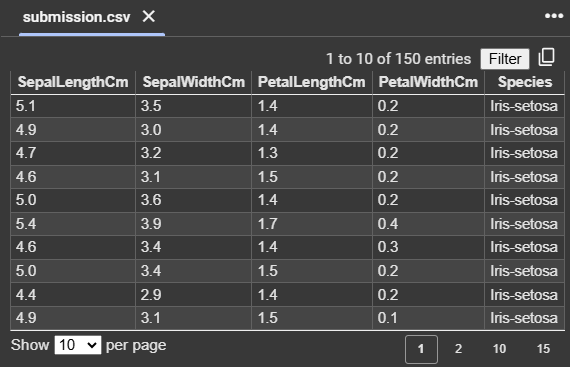

Genera un csv con las predicciones